# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)

slope = round(((np.mean(X) * np.mean(Y)) - np.mean(X*Y))/((np.mean(X))**2 - (np.mean(X**2))),2)
y_intercept = round(np.mean(Y) - (slope * (np.mean(X))), 2)

def reg_line(x):
    return(x*slope + y_intercept)

y_est = []
y_mean = np.mean(Y)

for i in range(0,len(X)):
    y_est.append((X[i] * slope) + y_intercept)

def ss_res(Y, y_est):
    sum_tot=0
    for i in range(0,len(Y)):
        sum_tot += (Y[i] - y_est[i])**2
    return sum_tot

def ss_tot(Y, y_mean):
    sum_tot = 0
    for i in range(0,len(Y)):
        sum_tot += (Y[i] - y_mean)**2
    return sum_tot   

r_squared = round(1-(ss_res(Y,y_est) / ss_tot(Y,y_mean)), 2)

print('''
Basic Regression Diagnostics
----------------------------
Slope = {}
Y-Intercept = {}
R-Squared = {}
----------------------------
Model: Y = {} * X + {}'''.format(slope,y_intercept,r_squared,slope,y_intercept))
        




Basic Regression Diagnostics
----------------------------
Slope = 0.56
Y-Intercept = 6.32
R-Squared = 0.97
----------------------------
Model: Y = 0.56 * X + 6.32


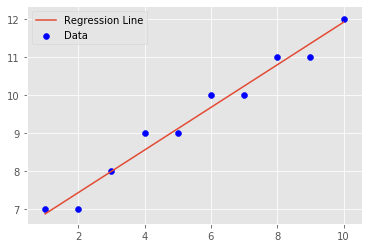

In [4]:
plt.plot(X, reg_line(X), label = 'Regression Line')
plt.scatter(X,Y, label = 'Data', color = 'blue')
plt.legend()

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

<function matplotlib.pyplot.show(*args, **kw)>

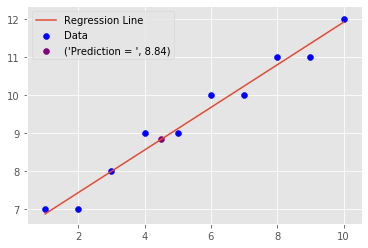

In [12]:
# Make prediction for x = 4.5 and visualize on the scatter plot
plt.plot(X, reg_line(X), label = 'Regression Line')
plt.scatter(X,Y, label = 'Data', color = 'blue')
plt.scatter(4.5,reg_line(4.5), label = ('Prediction = ', reg_line(4.5)), color = 'purple')
plt.legend()
plt.show

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y.  

In [14]:
import pandas as pd

df = pd.read_csv('heightWeight.csv')
df.head()
X2 = df['height']
Y2 = df['weight']


slope = round(((np.mean(X2) * np.mean(Y2)) - np.mean(X2*Y2))/((np.mean(X2))**2 - (np.mean(X2**2))),2)
y_intercept = round(np.mean(Y2) - (slope * (np.mean(X2))), 2)

def reg_line(x):
    return(x*slope + y_intercept)

y_est = []
y_mean = np.mean(Y2)

for i in range(0,len(X2)):
    y_est.append((X2[i] * slope) + y_intercept)

def ss_res(Y2, y_est):
    sum_tot=0
    for i in range(0,len(Y2)):
        sum_tot += (Y2[i] - y_est[i])**2
    return sum_tot

def ss_tot(Y2, y_mean):
    sum_tot = 0
    for i in range(0,len(Y2)):
        sum_tot += (Y2[i] - y_mean)**2
    return sum_tot   

r_squared = round(1-(ss_res(Y2,y_est) / ss_tot(Y2,y_mean)), 2)

print('''
Basic Regression Diagnostics
----------------------------
Slope = {}
Y-Intercept = {}
R-Squared = {}
----------------------------
Model: Y = {} * X + {}'''.format(slope,y_intercept,r_squared,slope,y_intercept))




Basic Regression Diagnostics
----------------------------
Slope = 5.54
Y-Intercept = -204.55
R-Squared = 0.96
----------------------------
Model: Y = 5.54 * X + -204.55


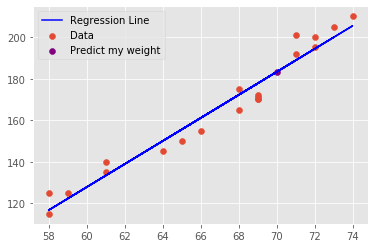

In [16]:
plt.scatter(X2, Y2, label = 'Data')
plt.plot(X2, reg_line(X2), label = 'Regression Line', color = 'blue')
plt.scatter(70, reg_line(70), label = 'Predict my weight', color = 'purple')
plt.legend()


## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication.